In [349]:
import numpy as np
import pandas as pd
df = pd.read_csv("diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [351]:
df.shape

(768, 9)

In [353]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [355]:
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [357]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [359]:
df.select_dtypes(include=['int64', 'float64']).columns 
# select_dtype : it gives only numeric column name in the data set 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [361]:
df.select_dtypes(exclude=['int64', 'float64']).columns 
# select_dtype : it gives other than numeric column name in the data set 

Index([], dtype='object')

In [363]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [365]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [367]:
cols = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]

(df[cols] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [369]:

# Replace 0 with NaN
df[cols] = df[cols].replace(0, np.nan)

# Impute with median
df[cols] = df[cols].fillna(df[cols].median())
(df[cols] == 0).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

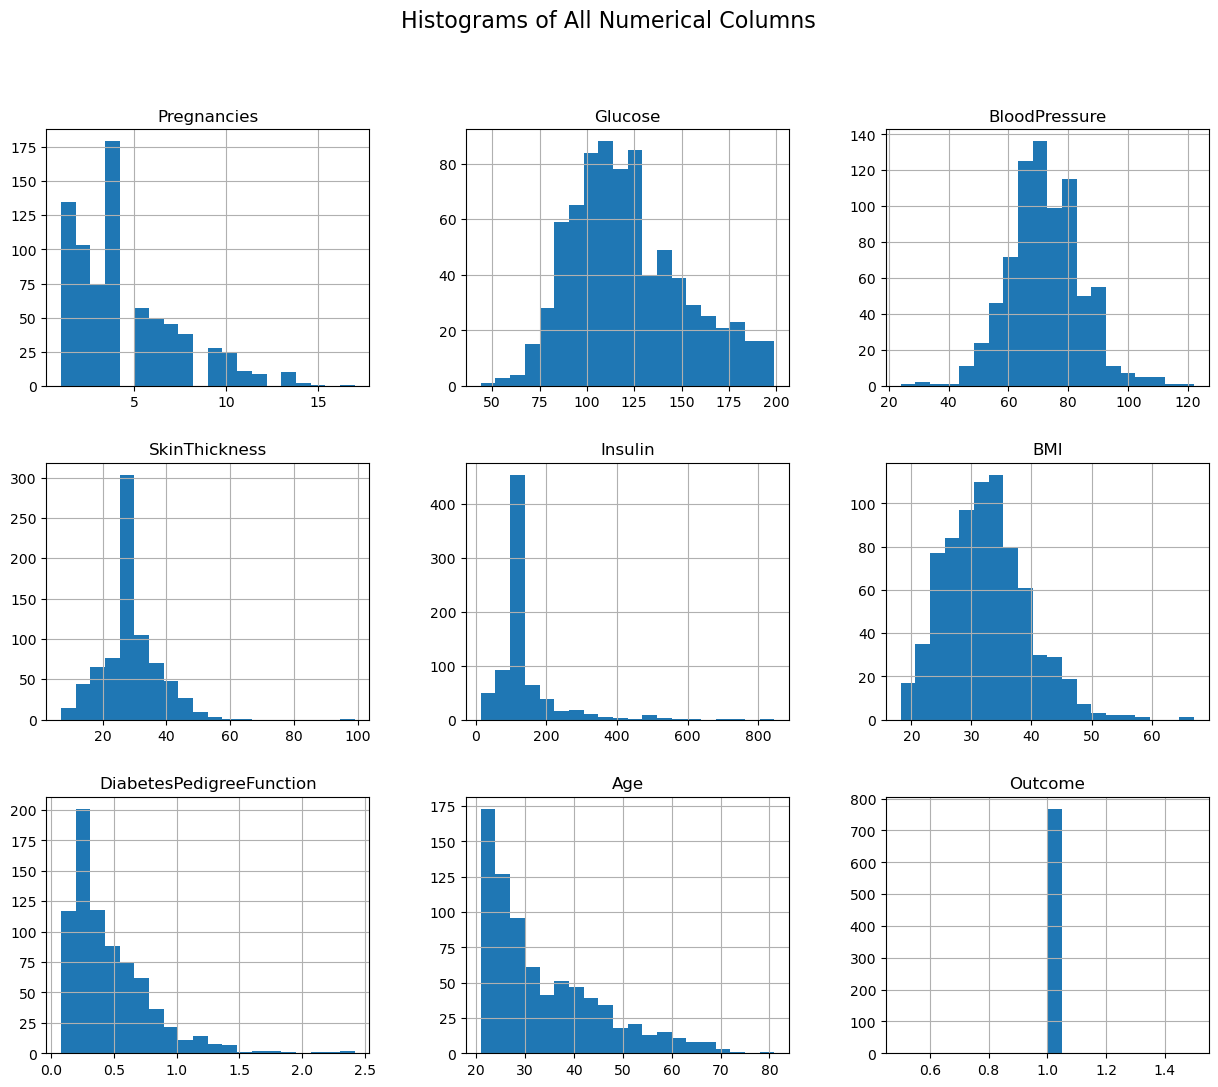

In [371]:
import matplotlib.pyplot as plt

df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].hist(figsize=(15, 12), bins=20)
plt.suptitle("Histograms of All Numerical Columns", fontsize=16)
plt.show()

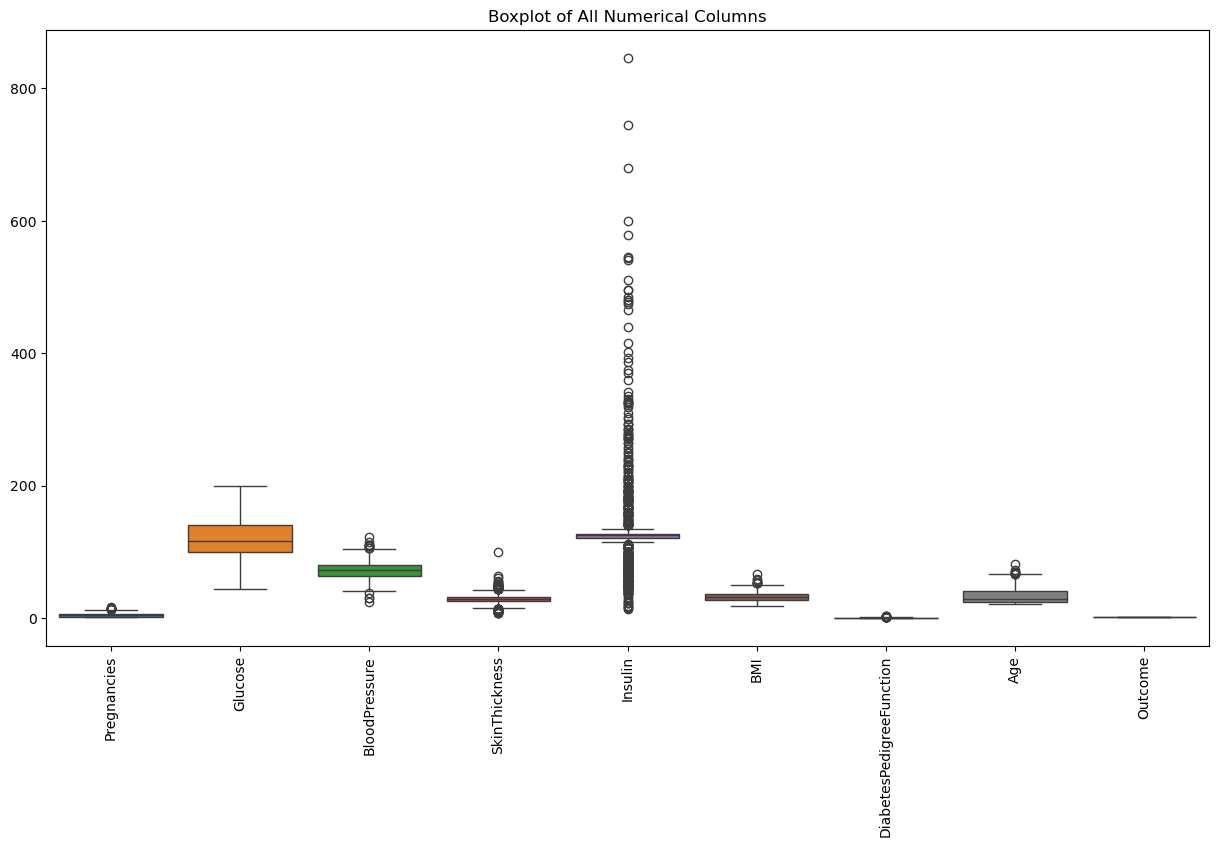

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])
plt.xticks(rotation=90)
plt.title("Boxplot of All Numerical Columns")
plt.show()


In [373]:
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Keep only values inside the range
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
   
print("Outliers removed successfully.")

Outliers removed successfully.


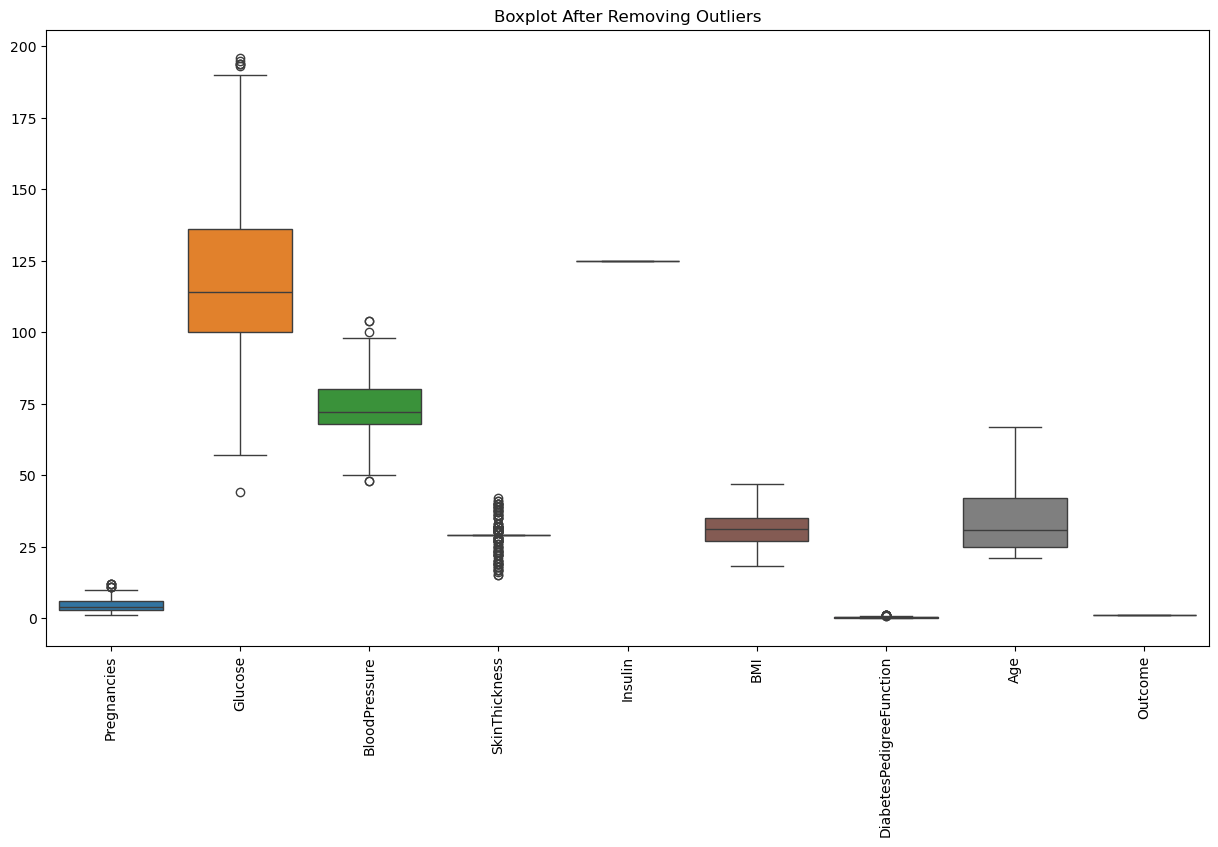

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot After Removing Outliers")
plt.show()

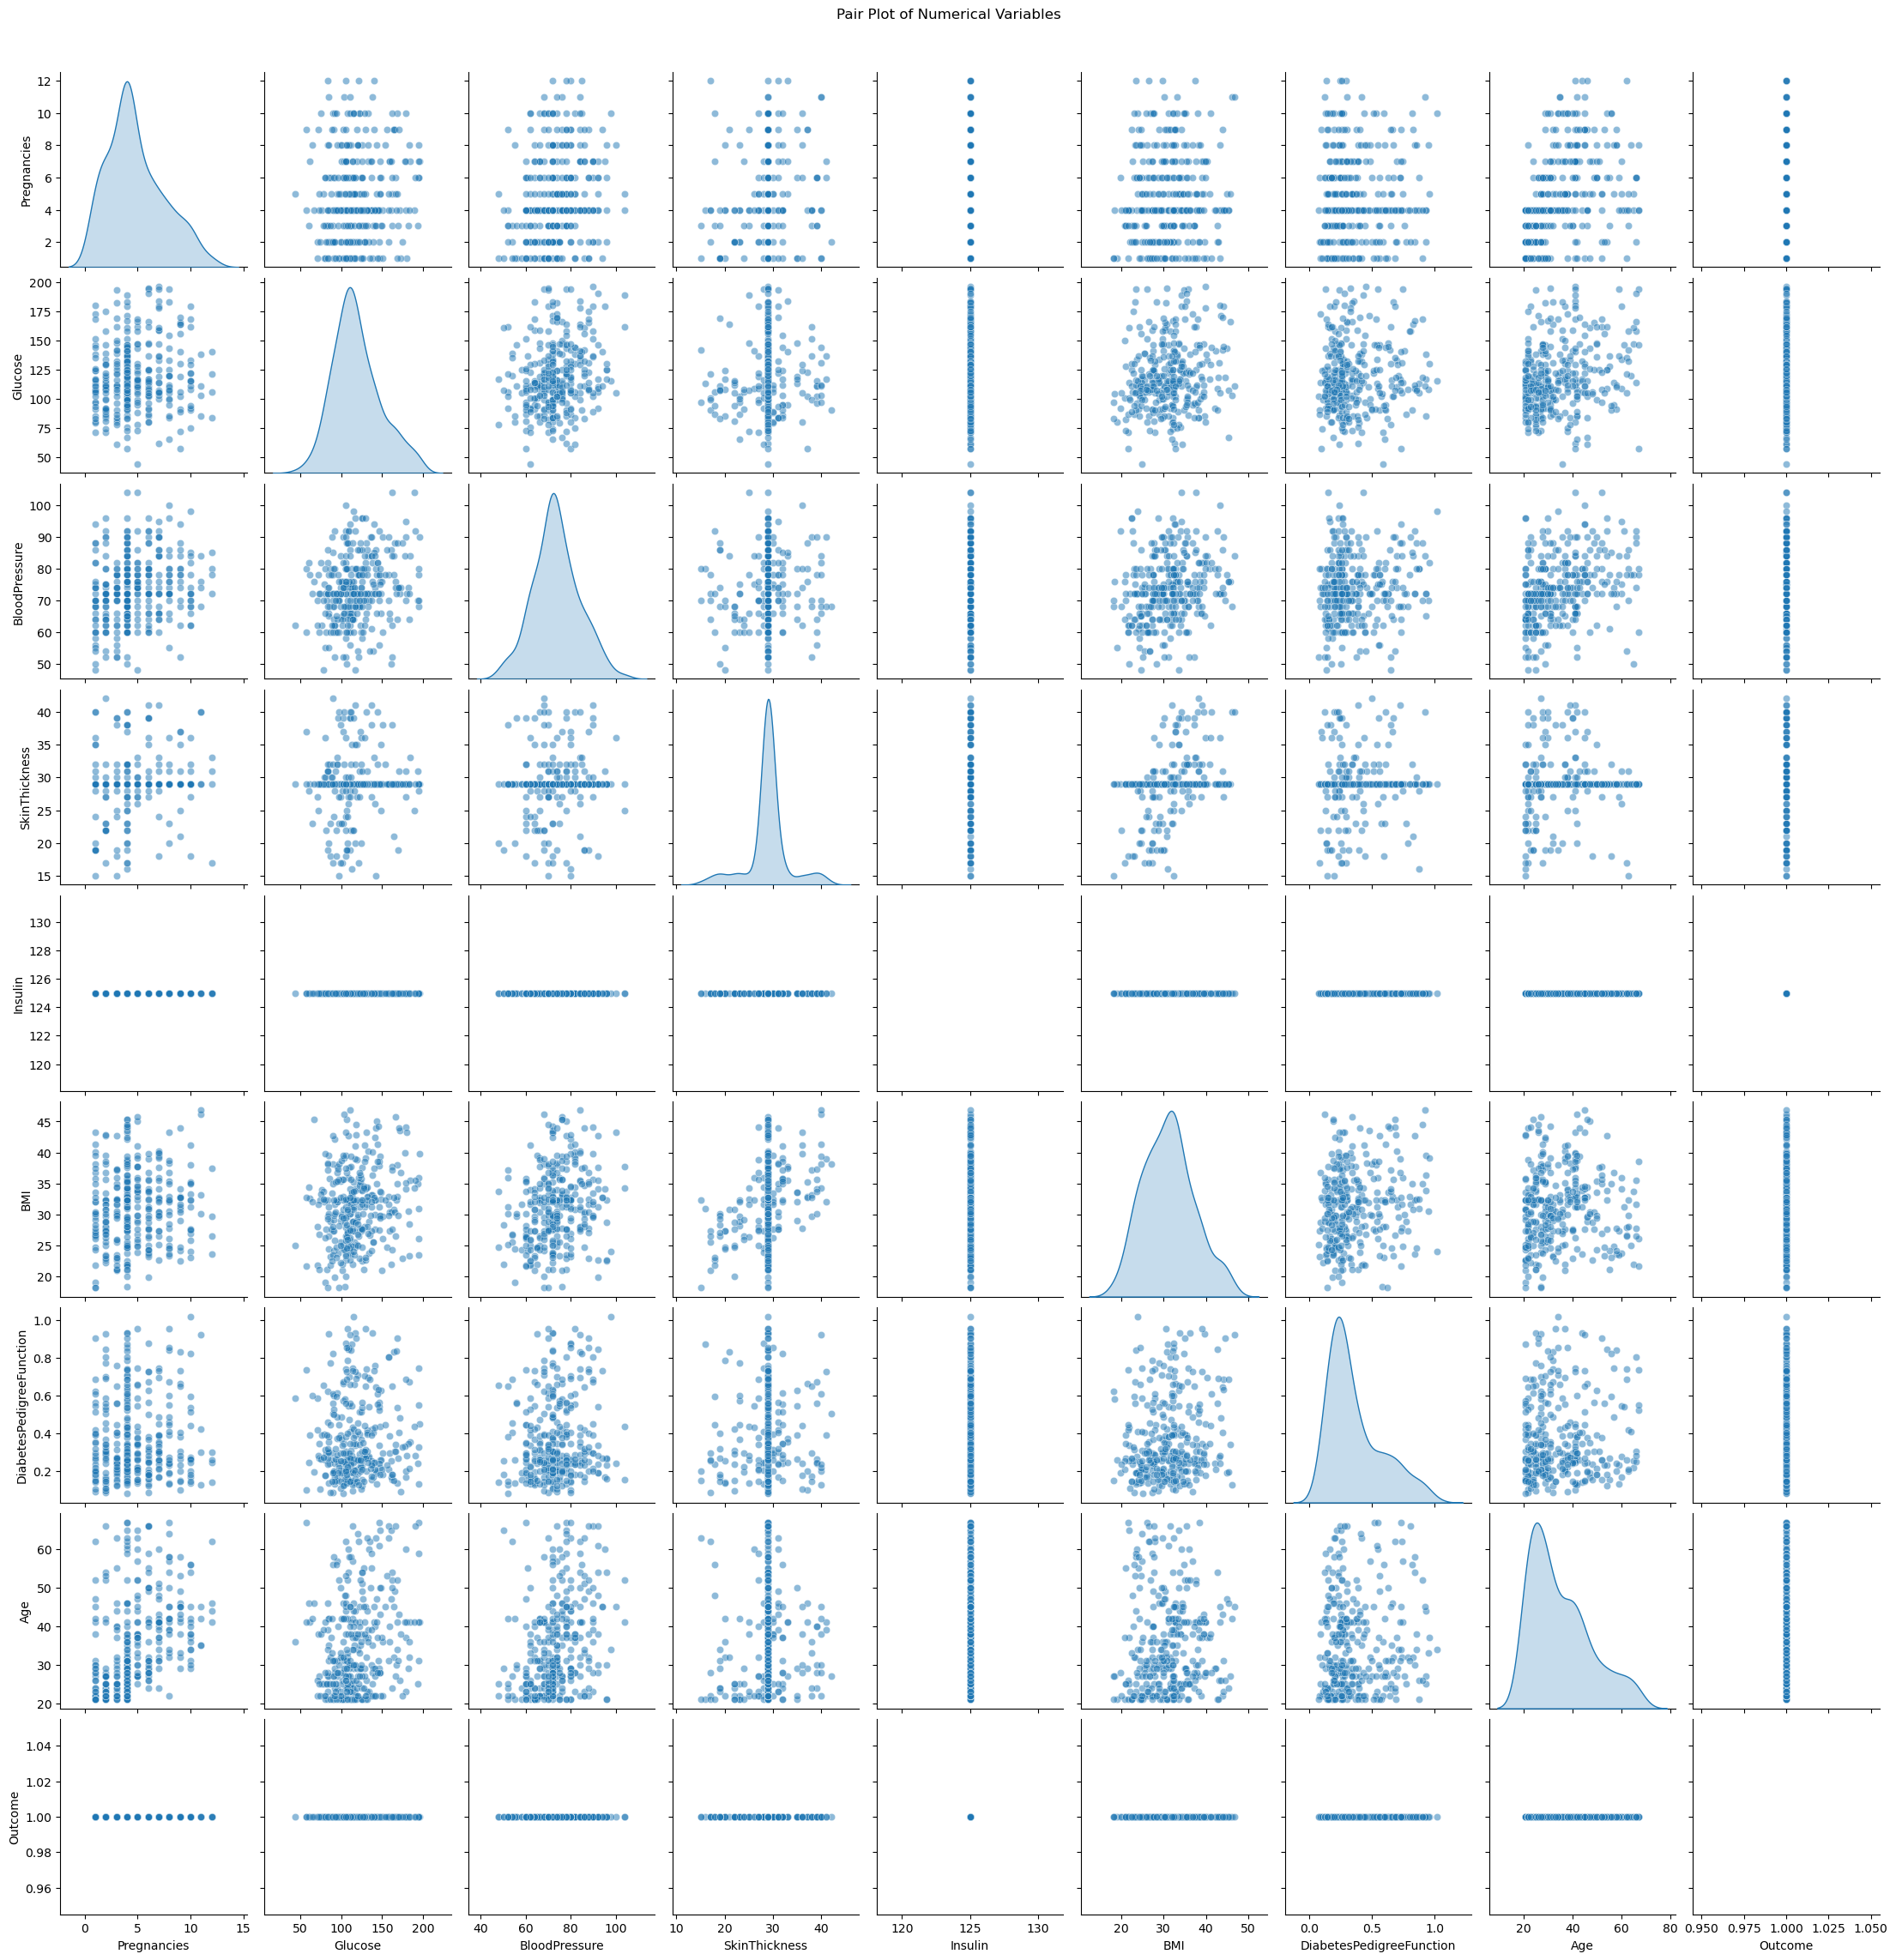

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.pairplot(df[numeric_cols],diag_kind="kde",plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()


In [377]:
#Analyze any patterns or correlations observed in the data.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.087981,0.203248,0.121174,NaN,0.072430,0.032534,0.402417,NaN
Glucose,0.087981,1.000000,0.229128,0.061555,NaN,0.175506,0.048568,0.251201,NaN
BloodPressure,0.203248,0.229128,1.000000,0.077940,NaN,0.239375,0.119698,0.319865,NaN
SkinThickness,0.121174,0.061555,0.077940,1.000000,NaN,0.360013,0.055624,0.061776,NaN
Insulin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,0.072430,0.175506,0.239375,0.360013,NaN,1.000000,0.166393,0.027549,NaN
DiabetesPedigreeFunction,0.032534,0.048568,0.119698,0.055624,NaN,0.166393,1.000000,0.071563,NaN
Age,0.402417,0.251201,0.319865,0.061776,NaN,0.027549,0.071563,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
#a. Handle missing values (e.g., imputation).
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [382]:
df.isnull().sum().sum()

0

In [383]:
#b. Encode categorical variables.
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", list(categorical_cols))
print(df[categorical_cols].head())

Categorical columns: []
Empty DataFrame
Columns: []
Index: [0, 1, 2, 5, 7]


In [384]:
# Step 1: Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load dataset
df = pd.read_csv("diabetes.csv")

# Step 3: Define features (X) and target (y)
X = df.drop("Outcome", axis=1)   # independent variables
y = df["Outcome"]                # dependent variable

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # increase iterations for convergence

# Step 6: Train the model
log_reg.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = log_reg.predict(X_test)

# Step 8: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7142857142857143

Confusion Matrix:
 [[82 18]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [385]:
# Step 1: Import required libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,log_loss
import matplotlib.pyplot as plt

# Step 2: Predictions (already done earlier)
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # probabilities for ROC curve

# Step 3: Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1-score: 0.56
ROC-AUC: 0.8229629629629629


In [386]:
from sklearn.metrics import roc_curve, roc_auc_score
TPR,FPR,dummy = roc_curve(y_test,y_pred_prob)

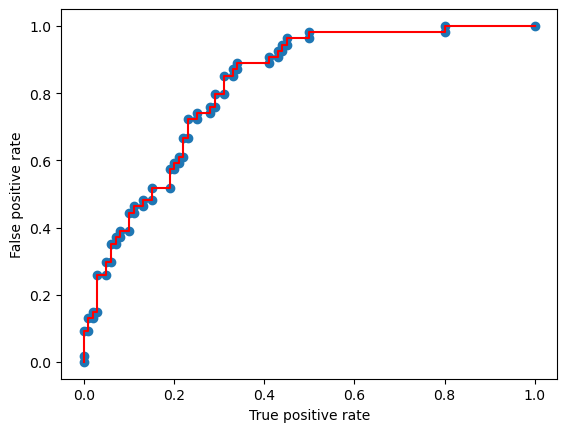

AUC score: 0.82


In [387]:
import matplotlib.pyplot as plt
plt.scatter(TPR,FPR)
plt.plot(TPR,FPR,color='red')
plt.xlabel("True positive rate")
plt.ylabel("False positive rate")
plt.show()

auc_score = roc_auc_score(y_test,y_pred_prob) 
print("AUC score:", np.round(auc_score,2))

In [388]:
loss = log_loss(y_test,y_pred_prob ) 
print("Log loss:", np.round(loss,2))

Log loss: 0.5


In [389]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})
print(coefficients)


                    Feature  Coefficient
0               Pregnancies     0.114122
1                   Glucose     0.036933
2             BloodPressure    -0.011167
3             SkinThickness     0.004527
4                   Insulin    -0.001244
5                       BMI     0.092718
6  DiabetesPedigreeFunction     0.706125
7                       Age     0.015527


In [390]:
coefficients["Importance"] = coefficients["Coefficient"].abs()
print(coefficients.sort_values(by="Importance", ascending=False))


                    Feature  Coefficient  Importance
6  DiabetesPedigreeFunction     0.706125    0.706125
0               Pregnancies     0.114122    0.114122
5                       BMI     0.092718    0.092718
1                   Glucose     0.036933    0.036933
7                       Age     0.015527    0.015527
2             BloodPressure    -0.011167    0.011167
3             SkinThickness     0.004527    0.004527
4                   Insulin    -0.001244    0.001244
